In [9]:
import numpy as np
X=np.array([[0,1,0,1],[1,1,1,0],[0,1,1,0],[0,0,0,1],[0,1,1,0],
            [0,1,0,1],[1,0,0,1]])
y=np.array([0,1,1,0,1,0,0])

counts={}
for label in np.unique(y):
    print(X[y==label])
    counts[label]=X[y==label].sum(axis=0)
    
print("feature counts:\n{}".format(counts))

[[0 1 0 1]
 [0 0 0 1]
 [0 1 0 1]
 [1 0 0 1]]
[[1 1 1 0]
 [0 1 1 0]
 [0 1 1 0]]
feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [12]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB
clf=BernoulliNB()
clf.fit(X,y)
Next_Day=[[0,0,1,0]]
pre=clf.predict(Next_Day)

if pre==[1]:
    print("下雨")
else:
    print("晴天")

print(clf.predict_proba(Next_Day))

下雨
[[0.13848881 0.86151119]]


Score:0.984


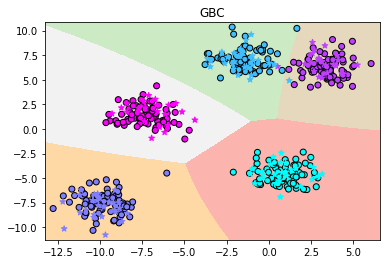

In [28]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X,y=make_blobs(n_samples=500,centers=5,random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)

gnb=GaussianNB()
gnb.fit(X_train,y_train)
print('Score:{:.3f}'.format(gnb.score(X_test,y_test)))

x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5

xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=gnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)

plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.title('GBC')
plt.show()

In [29]:
print(len(y_train),len(y_test))

375 125
